In [2]:
from keras.utils import to_categorical
from keras.models import Sequential
from keras.layers import Dense, Conv2D, Dropout, Flatten, MaxPooling2D
import os
import pandas as pd
import numpy as np

In [6]:
TRAIN_DIR = '/kaggle/input/face-expression-recognition-dataset/images/train'
TEST_DIR = '/kaggle/input/face-expression-recognition-dataset/images/validation'

In [4]:
def createdataframe(dir):
    image_paths = []
    labels = []
    for label in os.listdir(dir):
        for imagename in os.listdir(os.path.join(dir,label)):
            image_paths.append(os.path.join(dir,label,imagename))
            labels.append(label)
        print(label, "completed")
    return image_paths,labels


In [7]:
train = pd.DataFrame()
train['image'], train['label'] = createdataframe(TRAIN_DIR)

surprise completed
fear completed
angry completed
neutral completed
sad completed
disgust completed
happy completed


In [8]:
print(train)

                                                   image     label
0      /kaggle/input/face-expression-recognition-data...  surprise
1      /kaggle/input/face-expression-recognition-data...  surprise
2      /kaggle/input/face-expression-recognition-data...  surprise
3      /kaggle/input/face-expression-recognition-data...  surprise
4      /kaggle/input/face-expression-recognition-data...  surprise
...                                                  ...       ...
28816  /kaggle/input/face-expression-recognition-data...     happy
28817  /kaggle/input/face-expression-recognition-data...     happy
28818  /kaggle/input/face-expression-recognition-data...     happy
28819  /kaggle/input/face-expression-recognition-data...     happy
28820  /kaggle/input/face-expression-recognition-data...     happy

[28821 rows x 2 columns]


In [9]:
test = pd.DataFrame()
test['image'], test['label'] = createdataframe(TEST_DIR)

surprise completed
fear completed
angry completed
neutral completed
sad completed
disgust completed
happy completed


In [10]:
print(test)
print(test['image'])

                                                  image     label
0     /kaggle/input/face-expression-recognition-data...  surprise
1     /kaggle/input/face-expression-recognition-data...  surprise
2     /kaggle/input/face-expression-recognition-data...  surprise
3     /kaggle/input/face-expression-recognition-data...  surprise
4     /kaggle/input/face-expression-recognition-data...  surprise
...                                                 ...       ...
7061  /kaggle/input/face-expression-recognition-data...     happy
7062  /kaggle/input/face-expression-recognition-data...     happy
7063  /kaggle/input/face-expression-recognition-data...     happy
7064  /kaggle/input/face-expression-recognition-data...     happy
7065  /kaggle/input/face-expression-recognition-data...     happy

[7066 rows x 2 columns]
0       /kaggle/input/face-expression-recognition-data...
1       /kaggle/input/face-expression-recognition-data...
2       /kaggle/input/face-expression-recognition-data...
3       /

In [8]:
from tqdm.notebook import tqdm

In [36]:
import cv2
import numpy as np
from tqdm import tqdm

def extract_features(images):
    features = []
    for image in tqdm(images):
        img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
        img = cv2.resize(img, (48, 48))  # Resize image to (48, 48)
        img = np.array(img)
        features.append(img)
    features = np.array(features)
    return features

    

In [37]:
train_features = extract_features(train['image']) 

100%|██████████| 28821/28821 [00:50<00:00, 565.87it/s]


In [38]:
test_features = extract_features(test['image'])

100%|██████████| 7066/7066 [00:16<00:00, 435.49it/s]


In [39]:
x_train = train_features/255.0
x_test = test_features/255.0

In [40]:
from sklearn.preprocessing import LabelEncoder

In [41]:
le = LabelEncoder()
le.fit(train['label'])

LabelEncoder()

In [42]:
y_train = le.transform(train['label'])
y_test = le.transform(test['label'])

In [43]:
y_train = to_categorical(y_train,num_classes = 7)
y_test = to_categorical(y_test,num_classes = 7)

In [72]:
model = Sequential()
# convolutional layers
model.add(Conv2D(128, kernel_size=(3,3), activation='relu', input_shape=(48,48,1)))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(256, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Conv2D(512, kernel_size=(3,3), activation='relu'))
model.add(MaxPooling2D(pool_size=(2,2)))
model.add(Dropout(0.4))

model.add(Flatten())
# fully connected layers
model.add(Dense(512, activation='relu'))
model.add(Dropout(0.4))
model.add(Dense(256, activation='relu'))
model.add(Dropout(0.3))
# output layer
model.add(Dense(7, activation='softmax'))

In [73]:
model.compile(optimizer = 'adam', loss = 'categorical_crossentropy', metrics = 'accuracy' )

In [74]:
model.fit(x= x_train,y = y_train, batch_size = 128, epochs = 100, validation_data = (x_test,y_test)) 

Epoch 1/100


2024-02-16 03:25:08.347254: E tensorflow/core/grappler/optimizers/meta_optimizer.cc:961] layout failed: INVALID_ARGUMENT: Size of values 0 does not match size of permutation 4 @ fanin shape insequential_3/dropout_18/dropout/SelectV2-2-TransposeNHWCToNCHW-LayoutOptimizer


226/226 [==============================] - 14s 51ms/step - loss: 1.8251 - accuracy: 0.2432 - val_loss: 1.8117 - val_accuracy: 0.2583
Epoch 2/100
226/226 [==============================] - 11s 49ms/step - loss: 1.8037 - accuracy: 0.2501 - val_loss: 1.8000 - val_accuracy: 0.2525
Epoch 3/100
226/226 [==============================] - 11s 49ms/step - loss: 1.7400 - accuracy: 0.2880 - val_loss: 1.6779 - val_accuracy: 0.3358
Epoch 4/100
226/226 [==============================] - 11s 49ms/step - loss: 1.6352 - accuracy: 0.3495 - val_loss: 1.4888 - val_accuracy: 0.4329
Epoch 5/100
226/226 [==============================] - 11s 49ms/step - loss: 1.5185 - accuracy: 0.4068 - val_loss: 1.3706 - val_accuracy: 0.4701
Epoch 6/100
226/226 [==============================] - 11s 49ms/step - loss: 1.4492 - accuracy: 0.4401 - val_loss: 1.3282 - val_accuracy: 0.4950
Epoch 7/100
226/226 [==============================] - 11s 49ms/step - loss: 1.4013 - accuracy: 0.4597 - val_loss: 1.2757 - val_accuracy: 0.51

In [76]:
model_json = model.to_json()
with open("emotiondetector0.json",'w') as json_file:
    json_file.write(model_json)
model.save("emotiondetector0.h5")

In [77]:
from keras.models import model_from_json

In [78]:
json_file = open("/kaggle/working/emotiondetector0.json", "r")
model_json = json_file.read()
json_file.close()
model = model_from_json(model_json)
model.load_weights("/kaggle/working/emotiondetector0.h5")

In [79]:
label = ['angry','disgust','fear','happy','neutral','sad','surprise']

In [80]:
def ef(image):
    img = cv2.imread(image, cv2.IMREAD_GRAYSCALE)  # Read image in grayscale
    img = cv2.resize(img, (48, 48))  # Resize image to (48, 48)
    feature = np.array(img)
    feature = feature.reshape(1,48,48,1)
    return feature/255.0
    

In [81]:
image = '/kaggle/input/face-expression-recognition-dataset/images/train/sad/42.jpg'
print("original image is of sad")
img = ef(image)
pred = model.predict(img)
pred_label = label[pred.argmax()]
print("model prediction is ",pred_label)

original image is of sad
1/1 [==============================] - 0s 96ms/step
model prediction is  sad


In [82]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Évaluation du modèle
loss, accuracy = model.evaluate(x_test, y_test)
print("Test Loss:", loss)
print("Test Accuracy:", accuracy)

# Prédiction sur l'ensemble de test
y_pred = model.predict(x_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_true_classes = np.argmax(y_test, axis=1)

# Matrice de confusion
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)
print("Confusion Matrix:")
print(conf_matrix)




221/221 [==============================] - 1s 5ms/step - loss: 1.0475 - accuracy: 0.6340
Test Loss: 1.047493577003479
Test Accuracy: 0.634022057056427
221/221 [==============================] - 1s 4ms/step
Confusion Matrix:
[[ 521    8   49   76  143  139   24]
 [  27   61    5    3    6    7    2]
 [ 138    3  335   67  142  234   99]
 [  39    1   29 1580   79   68   29]
 [  95    2   38  131  738  192   20]
 [ 109    2   75   79  237  623   14]
 [  19    2   45   63   29   17  622]]


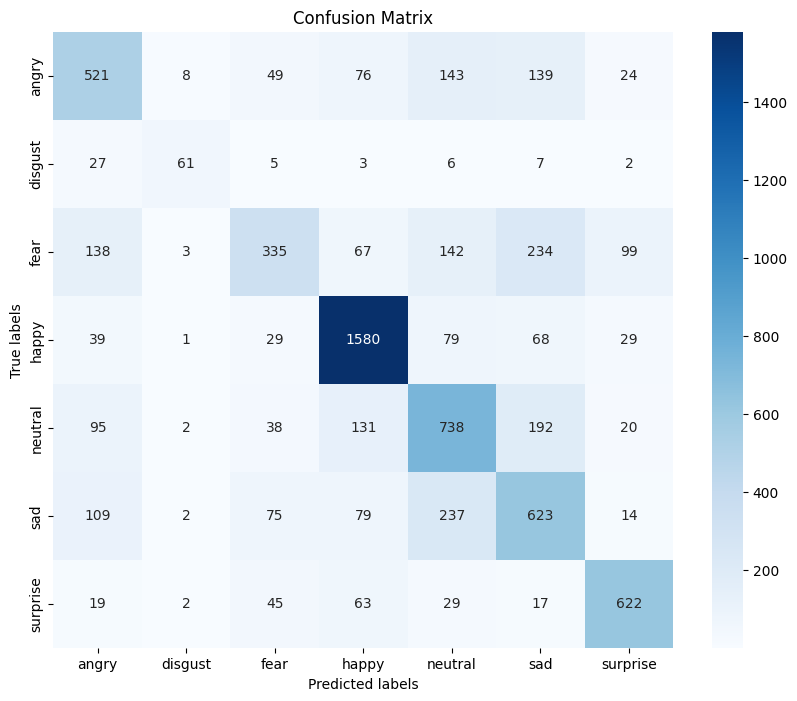

In [83]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_names = ['angry','disgust','fear','happy','neutral','sad','surprise']
# Matrice de confusion
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.title('Confusion Matrix')
plt.show()


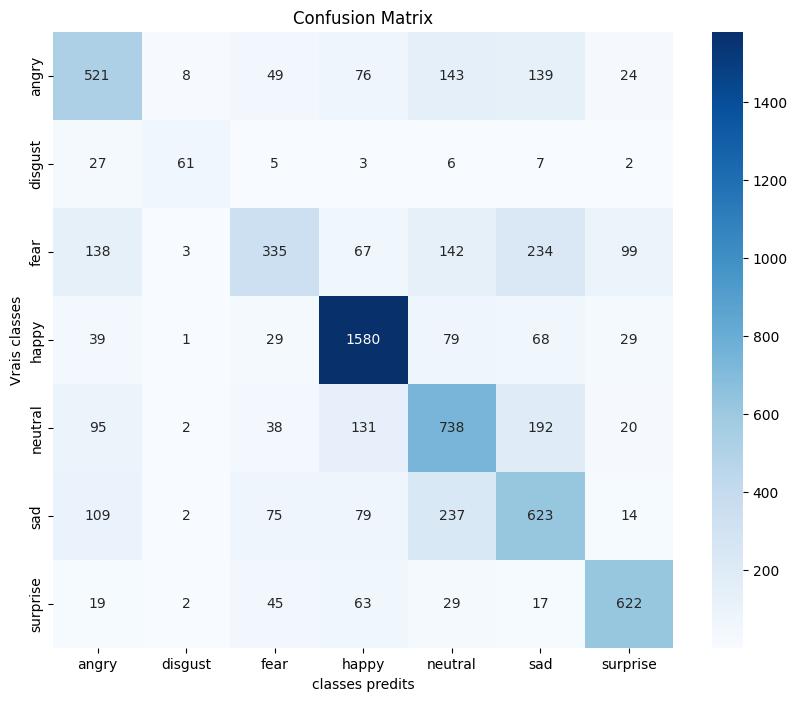

In [85]:
from sklearn.metrics import confusion_matrix
import seaborn as sns

class_names = ['angry','disgust','fear','happy','neutral','sad','surprise']
# Matrice de confusion
conf_matrix = confusion_matrix(y_true_classes, y_pred_classes)

# Plot
plt.figure(figsize=(10, 8))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', xticklabels=class_names, yticklabels=class_names)
plt.xlabel('classes predits')
plt.ylabel('Vrais classes')
plt.title('Confusion Matrix')
plt.show()